In [ ]:
import matplotlib as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix

In [ ]:
import keras
from keras.datasets import mnist
from keras.layers import Dense
from keras.models import Sequential
from matplotlib import pyplot as plt
from random import randint

In [ ]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
x_train_drawing=x_train

In [ ]:
print("x_train:",x_train[0])
print("y_train:",y_train[0])

x_train: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 2

In [ ]:
print("x_train_shape:",x_train.shape)
print("y_train_shape:",y_train.shape)


x_train_shape: (60000, 28, 28)
y_train_shape: (60000,)


In [ ]:
image_size=784
x_train=x_train.reshape(x_train.shape[0],image_size)
x_test=x_test.reshape(x_test.shape[0],image_size)


In [ ]:
print("After reshaping")
print("x_train_shape:",x_train.shape)
print("x_test_shape:",x_test.shape)

After reshaping
x_train_shape: (60000, 784)
x_test_shape: (10000, 784)


In [ ]:
num_classes = 10
y_train=keras.utils.to_categorical(y_train,num_classes)
y_test=keras.utils.to_categorical(y_test,num_classes)

In [ ]:
print(y_train.shape)
print(y_train[0])

(60000, 10)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


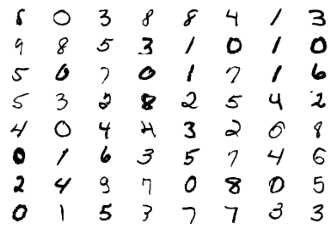

In [ ]:
for i in range(64):
  ax = plt.subplot(8,8,i+1)
  ax.axis('off')
  plt.imshow(x_train_drawing[randint(0,x_train.shape[0])],cmap='Greys')

In [ ]:
model = Sequential()
model.add(Dense(units=32,activation='sigmoid',input_shape=(image_size,)))
model.add(Dense(units=num_classes,activation='softmax'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 32)                25120     
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 25,450
Trainable params: 25,450
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(optimizer='sgd',loss='categorical_crossentropy',metrics=['accuracy'])
history=model.fit(x_train,y_train,batch_size=128,epochs=100,verbose=True,validation_split=.1)

Epoch 1/100
422/422 [==============================] - 2s 3ms/step - loss: 1.7385 - accuracy: 0.4710 - val_loss: 0.9612 - val_accuracy: 0.8188
Epoch 2/100
422/422 [==============================] - 1s 2ms/step - loss: 0.9309 - accuracy: 0.8142 - val_loss: 0.6928 - val_accuracy: 0.8755
Epoch 3/100
422/422 [==============================] - 1s 3ms/step - loss: 0.7107 - accuracy: 0.8558 - val_loss: 0.5672 - val_accuracy: 0.8873
Epoch 4/100
422/422 [==============================] - 1s 2ms/step - loss: 0.5966 - accuracy: 0.8710 - val_loss: 0.4918 - val_accuracy: 0.8978
Epoch 5/100
422/422 [==============================] - 1s 2ms/step - loss: 0.5228 - accuracy: 0.8829 - val_loss: 0.4458 - val_accuracy: 0.9045
Epoch 6/100
422/422 [==============================] - 1s 2ms/step - loss: 0.4824 - accuracy: 0.8868 - val_loss: 0.4002 - val_accuracy: 0.9097
Epoch 7/100
422/422 [==============================] - 1s 2ms/step - loss: 0.4476 - accuracy: 0.8927 - val_loss: 0.3854 - val_accuracy: 0.9108

In [ ]:
loss,accuracy=model.evaluate(x_test,y_test,verbose=True)

313/313 [==============================] - 0s 985us/step - loss: 0.2122 - accuracy: 0.9365


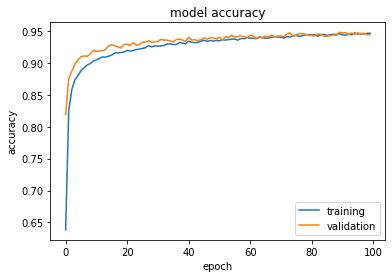

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['training','validation'],loc='best')
plt.show()